## Homework Python Programming for data analytics III


 <br>Author : Agies Soja Frisyalina 
 <br>NIK : 85068 
 <br>Email : mailto:agiessfrisyalina@telkomsel.co.id


# Case Study
## Titanic

This is one of many competitions that Kaggle provided. As we know, the sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. The purpose of this challenge is to complete the analysis of what sorts of people were likely to survive or in particular is to apply the tools of machine learning to predict which passengers survived the tragedy.

Link from Kaggle: https://www.kaggle.com/c/titanic

### Load Data

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
titanic=pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [19]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5,1,'Titanic Survivors')

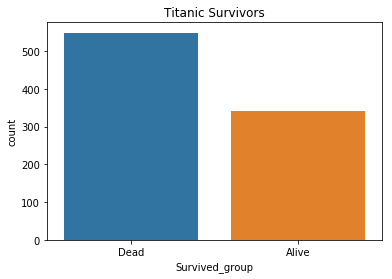

In [10]:
#Survivor of Titanic
def Survived_group(data):
    data['Survived_group'] = 'NaN'
    data.loc[data['Survived'] <= 0, 'Survived_group'] = 'Dead' 
    data.loc[data['Survived'] >= 1, 'Survived_group'] = 'Alive' 
    return data
titanic = Survived_group(titanic)          
titanic['Survived_group']=titanic['Survived_group'].replace('NaN','Unknown')
titanic['Survived_group'] = titanic['Survived_group'].astype(str)


sns.countplot('Survived_group', data = titanic)
plt.title('Titanic Survivors')

## Feature: Sex

In [13]:
pd.crosstab([titanic['Sex']],titanic['Survived_group'], margins=True).style.background_gradient(cmap='summer_r')

Survived_group,Alive,Dead,All
Sex,,,
female,233,81,314
male,109,468,577
All,342,549,891


Most of female passanger Survive (233)

## Features: Age

### Age Classification

<br>Infant, from 0 to 5
<br>Child, from 5 to 12
<br>Teenager, from 12 to 18
<br>Young Adult, from 18 to 35
<br>Adult, from 35 to 60
<br>Senior, from 60 to 100

In [12]:
def age_class(data):
    data['Age_group'] = "NaN"
    data.loc[data['Age'] <= 0, 'Age_group'] = 'Unknown' # Child
    data.loc[(data['Age'] > 0) & (data['Age'] <= 5), 'Age_group'] = '1. Infant' 
    data.loc[(data['Age'] > 5) & (data['Age'] <= 12), 'Age_group'] = '2. Child' 
    data.loc[(data['Age'] > 12) & (data['Age'] <= 18), 'Age_group'] = '3. Teenager' 
    data.loc[(data['Age'] > 18) & (data['Age'] <= 35), 'Age_group'] = '4. Young Adult'
    data.loc[(data['Age'] > 35) & (data['Age'] <= 60), 'Age_group'] = '5. Adult' 
    data.loc[data['Age'] > 60, 'Age_group'] = '6. Senior' 
    return data

titanic = age_class(titanic)
titanic['Age_group']=titanic['Age_group'].replace('NaN','7. Unknown')
titanic.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_group,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Dead,4. Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Alive,5. Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alive,4. Young Adult


In [17]:
pd.crosstab([titanic['Sex'],titanic['Survived'] ],titanic['Age_group'], margins=True).style.background_gradient(cmap='summer_r')


Most victims are: men with Young Adult category (195)

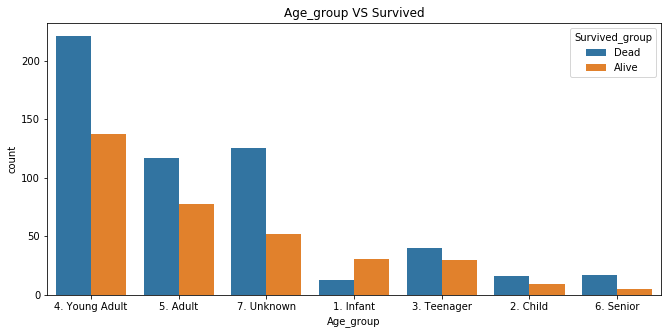

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(11,5))
sns.countplot("Age_group", hue = "Survived_group", data = titanic)
plt.title("Age_group VS Survived")
plt.show()
fig.savefig('fig_tgs/Age_group VS Survived.png')


- In the infant category, the number of passengers who survived> passengers who died
- Most of the dead and survivors are young adult

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


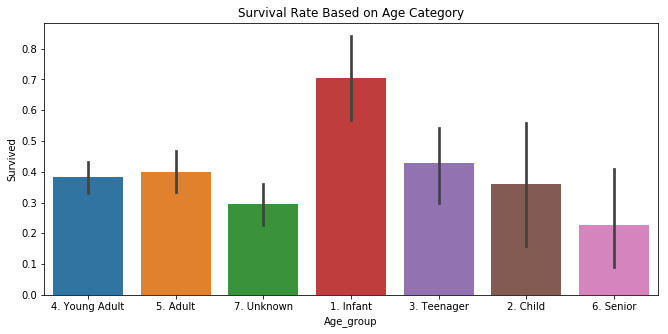

In [18]:
#survival rate
fig, ax = plt.subplots(1, 1, figsize=(11,5))
sns.barplot(x='Age_group', y='Survived', data=titanic)
plt.title("Survival Rate Based on Age Category")
plt.show()
fig.savefig('fig_tgs/Survival Rate Based on Age Cat.png')

- The highest survival rate is in the Infant category (0-5 yrs)
- The lowest survival rate is in the Senior category (> 60 yrs)

## Features: Pclass

In [19]:
pd.crosstab([titanic['Sex'],titanic['Survived_group']], titanic['Pclass'],margins=True).style.background_gradient(cmap='summer_r')

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


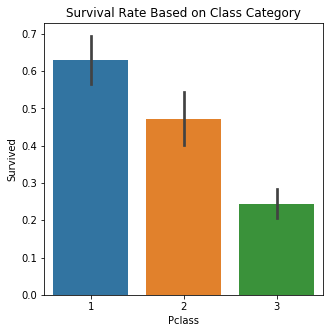

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.title("Survival Rate Based on Class Category")
plt.show()
fig.savefig('fig_tgs/Survival Rate Based on Class Cat.png')

In [55]:
survivability = titanic.groupby(['Sex','Pclass','Age_group']).agg({'Survived':lambda x : (x==1).sum() / x.count()}).reset_index()

• First class female passengers survived the most (91)<br>
• Third Class male passengers died most (300)<br>
• The greatest Survival Rate is First Class passengers

## Features: Embarked

In [20]:
pd.crosstab([titanic['Pclass'],titanic['Survived_group']],[titanic['Embarked'],titanic['Sex']],\
            margins=True).style.background_gradient(cmap='summer_r')

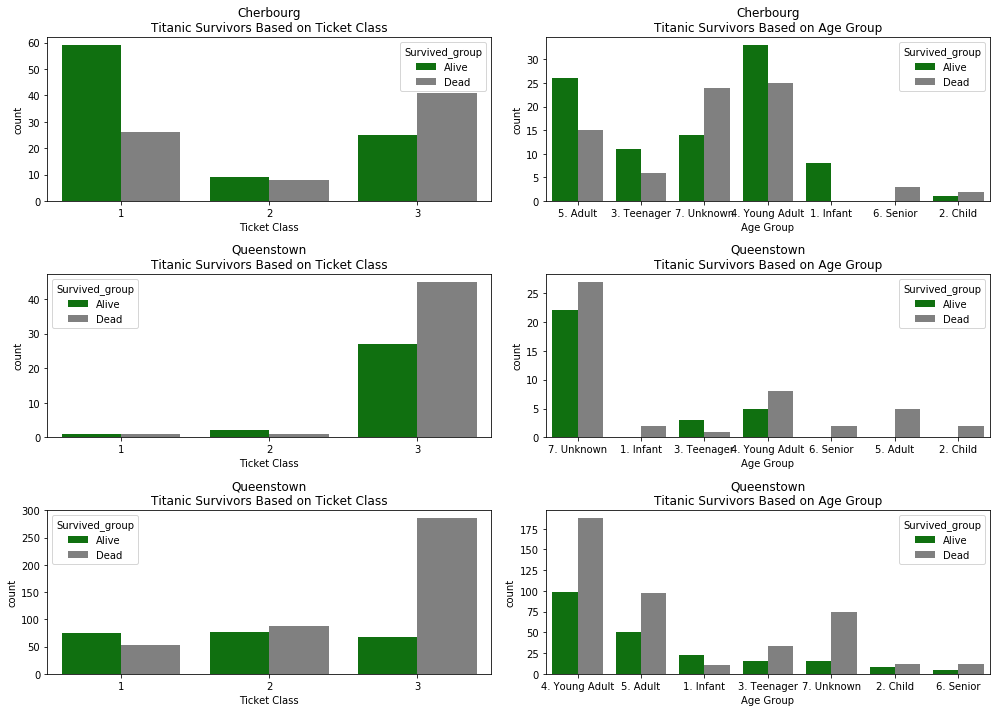

In [22]:
fig, axes = plt.subplots(3, 2,figsize=(14, 10));

Cherbourg = titanic[titanic['Embarked']=='C']
Queenstown = titanic[titanic['Embarked']=='Q']
Southampton = titanic[titanic['Embarked']=='S']

a = sns.countplot('Pclass',hue='Survived_group',data=Cherbourg,ax=axes[0,0],palette={'Alive':'green','Dead':'grey'},hue_order={'Alive','Dead'})
axes[0,0].set_xlabel('Ticket Class')
axes[0,0].set_title('Cherbourg\nTitanic Survivors Based on Ticket Class')

b = sns.countplot('Age_group',hue='Survived_group',data=Cherbourg,ax=axes[0,1],palette={'Alive':'green','Dead':'grey'},hue_order={'Alive','Dead'})
axes[0,1].set_xlabel('Age Group')
axes[0,1].set_title('Cherbourg\nTitanic Survivors Based on Age Group')

c = sns.countplot('Pclass',hue='Survived_group',data=Queenstown,ax=axes[1,0],palette={'Alive':'green','Dead':'grey'},hue_order={'Alive','Dead'})
axes[1,0].set_xlabel('Ticket Class')
axes[1,0].set_title('Queenstown\nTitanic Survivors Based on Ticket Class')

d = sns.countplot('Age_group',hue='Survived_group',data=Queenstown,ax=axes[1,1],palette={'Alive':'green','Dead':'grey'},hue_order={'Alive','Dead'})
axes[1,1].set_xlabel('Age Group')
axes[1,1].set_title('Queenstown\nTitanic Survivors Based on Age Group')

e = sns.countplot('Pclass',hue='Survived_group',data=Southampton,ax=axes[2,0],palette={'Alive':'green','Dead':'grey'},hue_order={'Alive','Dead'})
axes[2,0].set_xlabel('Ticket Class')
axes[2,0].set_title('Queenstown\nTitanic Survivors Based on Ticket Class')

f = sns.countplot('Age_group',hue='Survived_group',data=Southampton,ax=axes[2,1],palette={'Alive':'green','Dead':'grey'},hue_order={'Alive','Dead'})
axes[2,1].set_xlabel('Age Group')
axes[2,1].set_title('Queenstown\nTitanic Survivors Based on Age Group')

fig.tight_layout()
fig.savefig('fig_tgs/Survival Rate Based on Embarked.png')

- Most first class passengers are from Cherbourg
- Most passengers who survived from Cherbough were in the Young Adult category
- Passengers from Queenstown buy most are 3rd class tickets
- The most died passenger segment from Queenstown is the Young Adult category

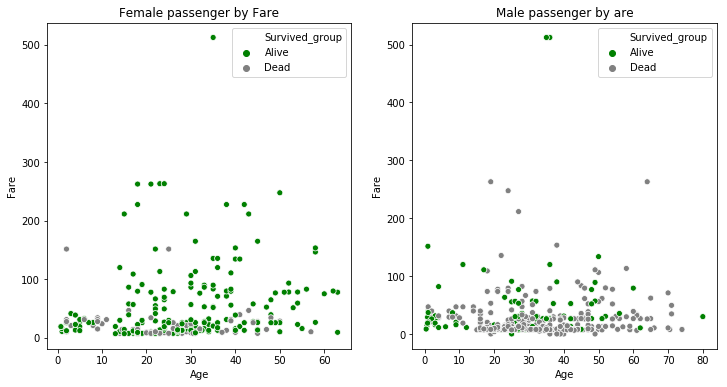

In [23]:
fig, axes = plt.subplots(1, 2,figsize=(12, 6))

female = titanic[titanic['Sex']=='female']
male = titanic[titanic['Sex']=='male']

a = sns.scatterplot(x='Age', y='Fare', hue='Survived_group', data=female, ax=axes[0], palette={'Alive':'green','Dead':'grey'}, hue_order={'Alive','Dead'})
b = sns.scatterplot(x='Age', y='Fare', hue='Survived_group', data=male, ax=axes[1], palette={'Alive':'green','Dead':'grey'}, hue_order={'Alive','Dead'})

axes[0].set_title('Female passenger by Fare')
axes[1].set_title('Male passenger by are')

fig.savefig('fig_tgs/Scatterplot.png')

most of male passengers who pay less are victims